## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv("SampleSuperstore.csv")

In [10]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Data Wrangling

In [11]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

From the dataset , we can conclude that there is no null values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Sales,Postal Code,quantity,Discount,Profit are numrical variables. Rest are all categorical or string variables.

## Data Visualization 

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

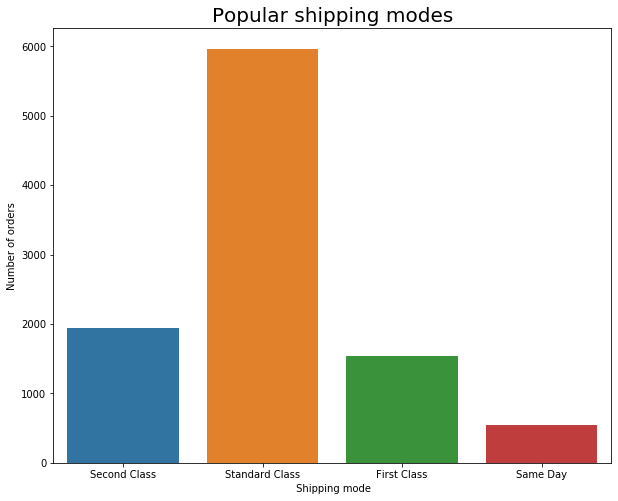

In [14]:
plt.figure(figsize=(10,8))
sns.countplot('Ship Mode',data=df)

plt.title('Popular shipping modes',size=20)
plt.xlabel(' Shipping mode',size=10)
plt.ylabel('Number of orders',size=10)
plt.xticks(fontsize=10)

From the above plot we can see that Standard Class has been utilised more by the customers. Number of orders has been more . This is because standard class will cost least on the same day than premium day class

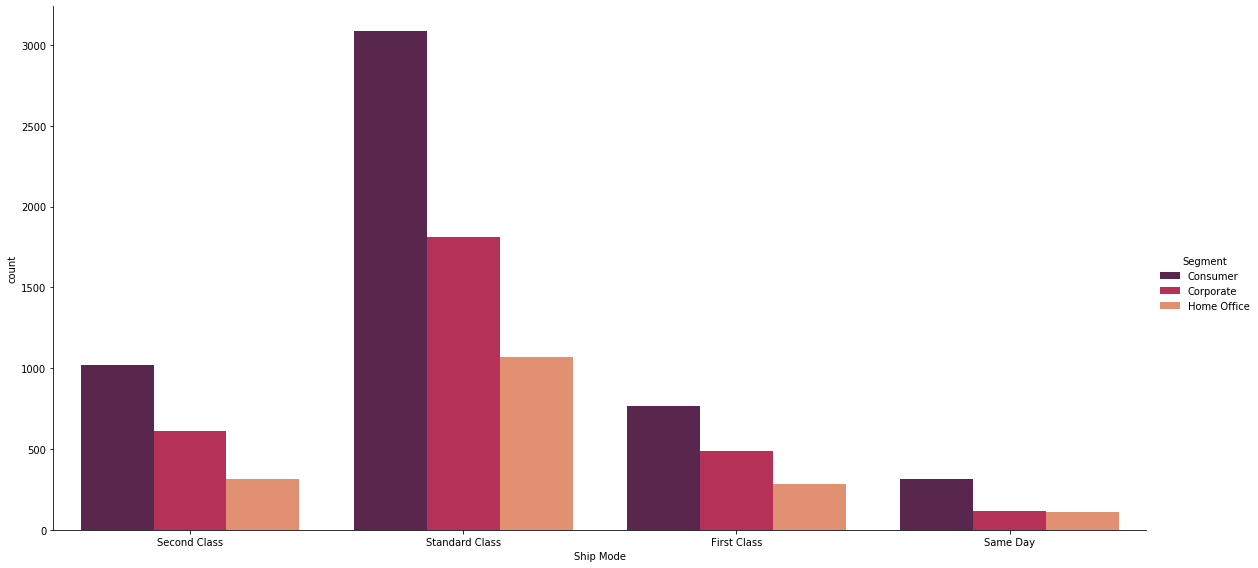

In [15]:
# Shipping of each segment
sns.catplot('Ship Mode',data=df,hue='Segment',kind='count',palette='rocket',aspect=2,height=8)

In [18]:
df_quant=df.groupby('Segment')['Quantity'].sum().reset_index()

Text(0.5, 1.0, 'Quantities ordered by each segment')

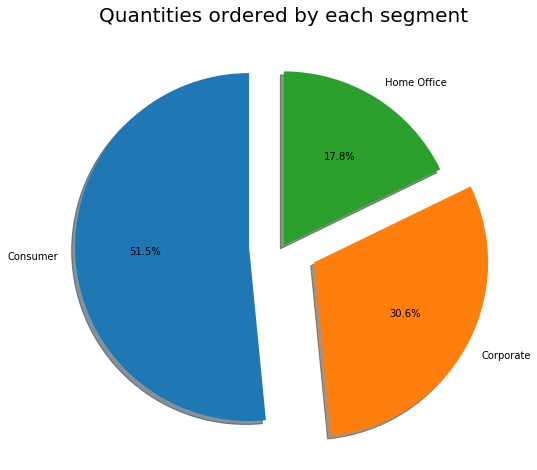

In [20]:
#Quantities ordered

labels=df['Segment'].unique()
plt.figure(figsize=(10,8))
plt.pie(df_quant['Quantity'],autopct='%1.1f%%',labels=labels,shadow=True,explode=(0.2,0.2,0),startangle=90)
plt.title('Quantities ordered by each segment',size=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

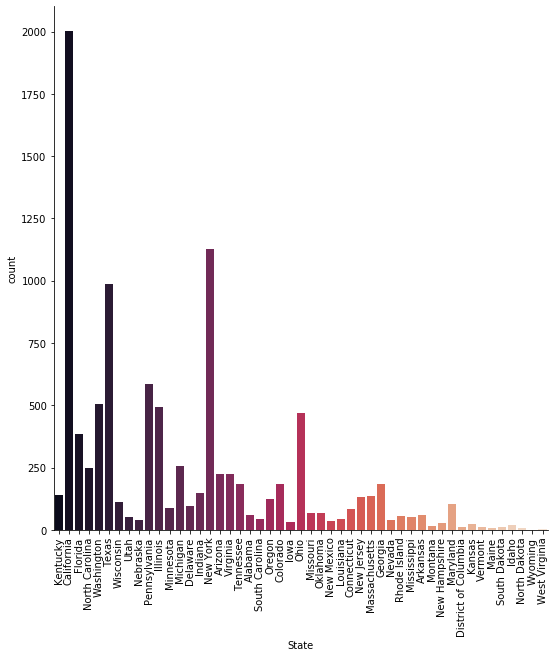

In [24]:
sns.catplot('State',kind='count',data=df,palette='rocket',height=8,aspect=1)
plt.xticks(rotation=90)

In [25]:
# Top 10 cities have highest number of order by quantities
df_top10=df.groupby('City')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False)

In [27]:
df_top10.head()

,City,Quantity
329,New York City,3417
266,Los Angeles,2879
374,Philadelphia,1981
438,San Francisco,1935
452,Seattle,1590


Text(0.5, 6.799999999999997, 'City')

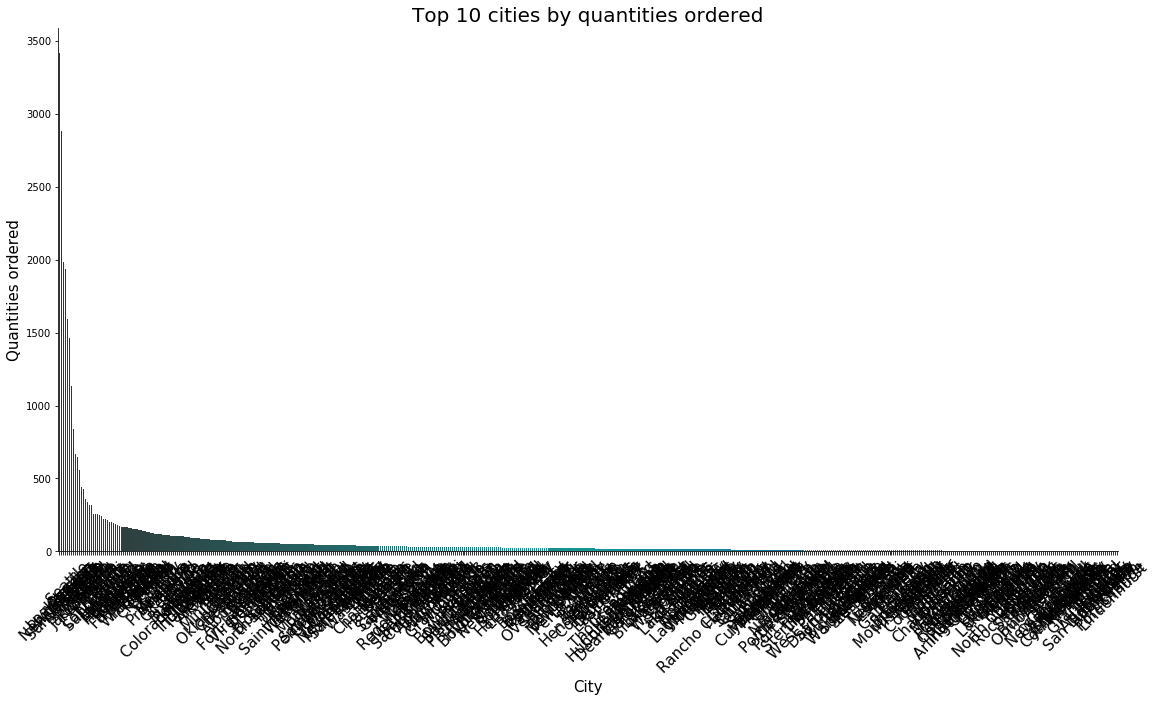

In [28]:
sns.catplot('City','Quantity',data=df_top10,kind='bar',height=8,aspect=2,palette='winter_d')
plt.xticks(size=15,rotation=45)
plt.title('Top 10 cities by quantities ordered',size=20)
plt.ylabel('Quantities ordered',size=15)
plt.xlabel('City',size=15)

In [29]:
df_region=df.groupby('Region')['Quantity'].sum().reset_index()
df_region

,Region,Quantity
0,Central,8780
1,East,10618
2,South,6209
3,West,12266


Text(0.5, 1.0, 'Quantities ordered by each region')

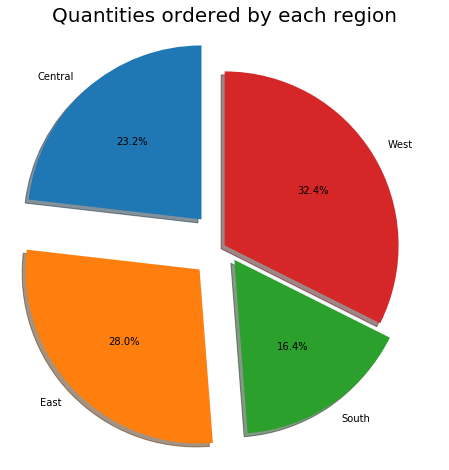

In [30]:
# Quantities region wise
labels=df_region['Region'].unique()
plt.figure(figsize=(10,8))
plt.pie(df_region['Quantity'],autopct='%1.1f%%',labels=labels,shadow=True,explode=(0.2,0.2,0.1,0),startangle=90)
plt.title('Quantities ordered by each region',size=20)

In [31]:
# Most selling categories
df_cats=df.groupby('Category')['Quantity'].sum().reset_index()
df_cats

,Category,Quantity
0,Furniture,8028
1,Office Supplies,22906
2,Technology,6939


Text(0.5, 1.0, 'Distribution of products sold')

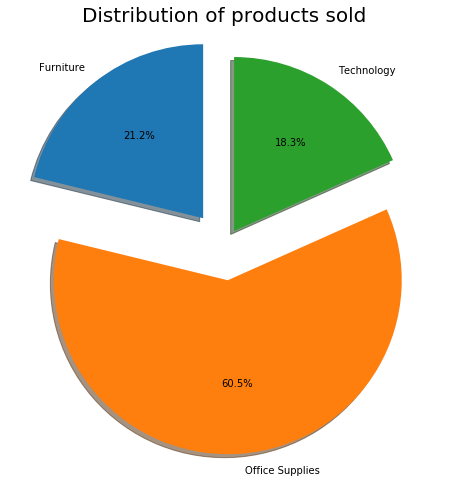

In [32]:
plt.figure(figsize=(10,8))
labels=df_cats['Category'].unique()
plt.pie(df_cats['Quantity'],autopct='%1.1f%%',labels=labels,shadow=True,explode=(0.2,0.2,0.1),startangle=90)

plt.title('Distribution of products sold',size=20)


Text(0.5, 1, 'Sub-Category orders placed')

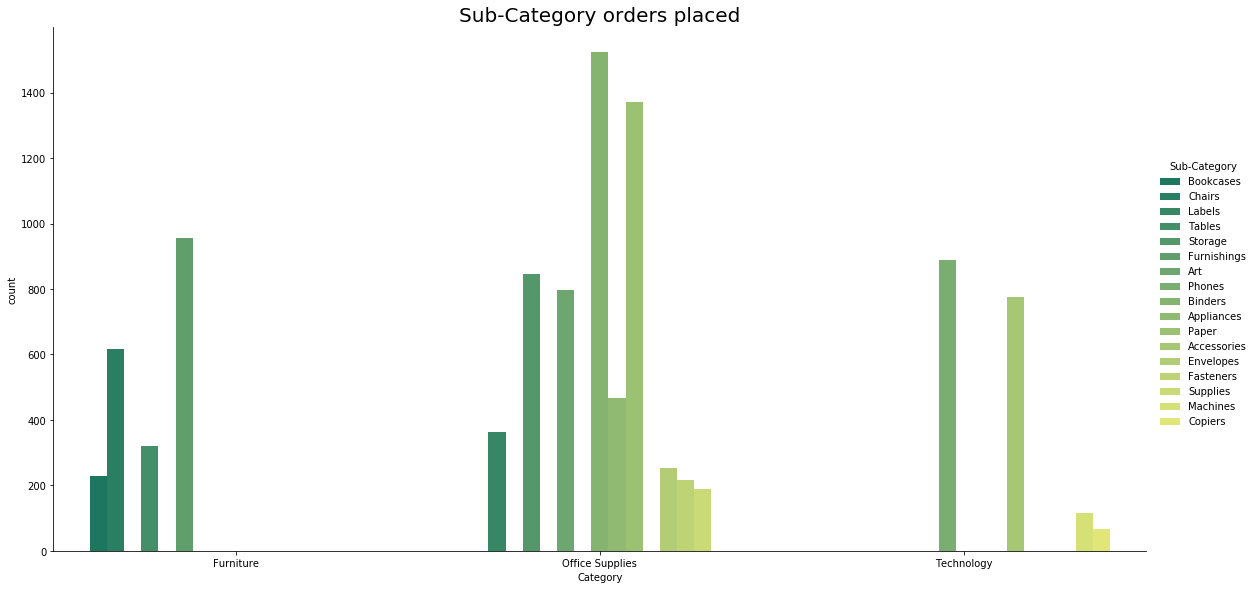

In [33]:
# Sub-category orders

sns.catplot('Category',kind='count',hue='Sub-Category',data=df,height=8,aspect=2,palette='summer')
plt.title('Sub-Category orders placed',size=20)

In [34]:
# Profitable Categories

df_prof=df.groupby('Category')['Profit'].sum().reset_index()

In [35]:
df_prof

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


Text(0.5, 1.0, 'Distribution of profits categorywise')

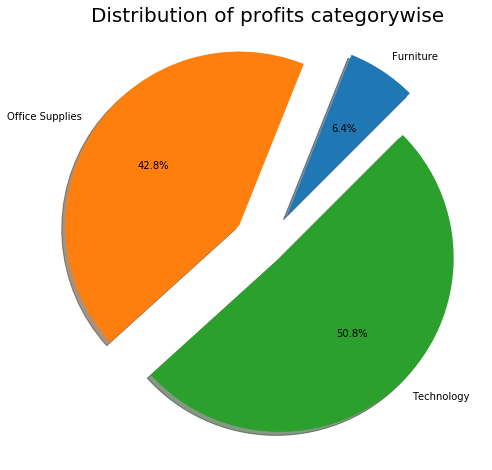

In [36]:
plt.figure(figsize=(10,8))
labels=df_prof['Category'].unique()
plt.pie(df_prof['Profit'],autopct='%1.1f%%',labels=labels,shadow=True,explode=(0.2,0.2,0.1),startangle=45)

plt.title('Distribution of profits categorywise',size=20)

In [37]:
df_top10_items=df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)

In [38]:

df_top10_items.reset_index(drop=True,inplace=True)

In [39]:
df_top10_items=df_top10_items.head(10)

Text(0.5, 6.799999999999997, 'Products')

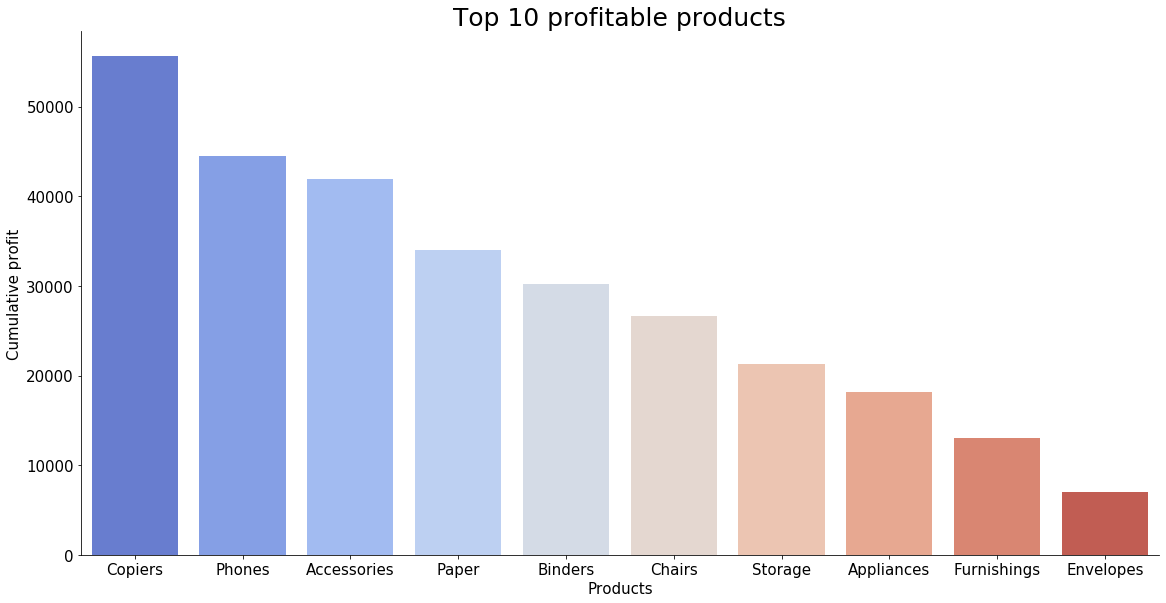

In [40]:
sns.catplot('Sub-Category','Profit',data=df_top10_items,kind='bar',aspect=2,height=8,palette='coolwarm')
plt.title('Top 10 profitable products',size=25)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Cumulative profit',size=15)
plt.xlabel('Products',size=15)

In [41]:
# Top 10 Profitable cities
df_top10_cities=df.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)

In [43]:
df_top10_cities.head()

,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908


Text(0.5, 6.799999999999997, 'City')

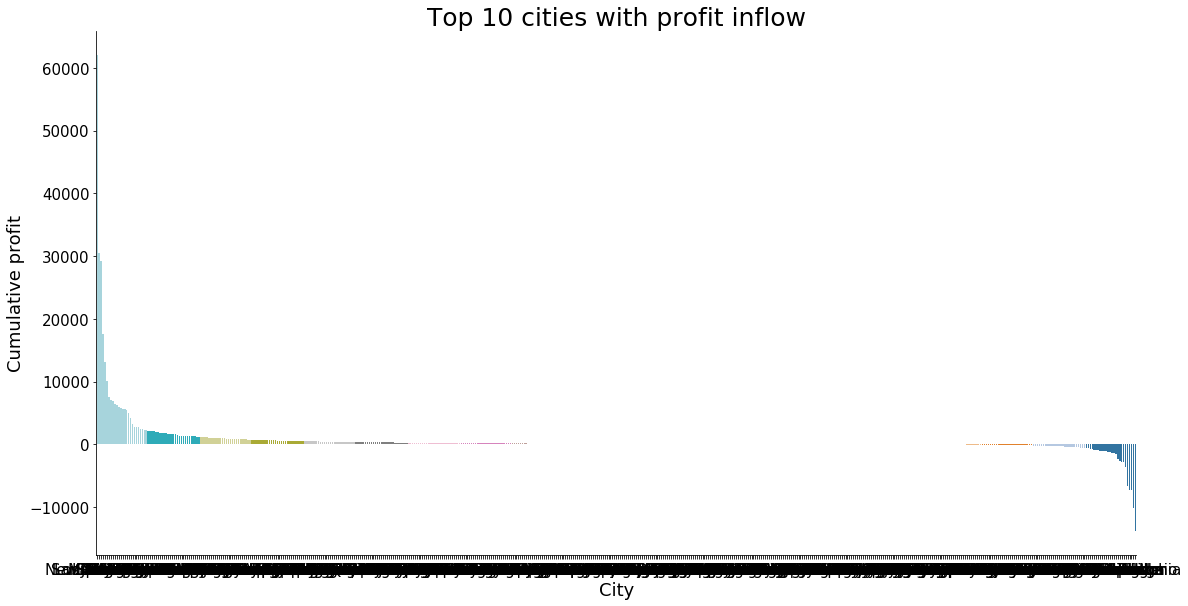

In [44]:
sns.catplot('City','Profit',data=df_top10_cities,kind='bar',aspect=2,height=8,palette='tab20_r')
plt.title('Top 10 cities with profit inflow',size=25)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Cumulative profit',size=18)
plt.xlabel('City',size=18)